In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Load Data Set

Since 'join_date' and 'quit_date' are passed as objects not as strings we will convert them to date-time object

In [2]:
data = pd.read_csv("/Users/uditanand/Desktop/DataMasked/Employee_Retention/employee_retention_data.csv", parse_dates=['join_date', 'quit_date'])

In [3]:
data.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [5]:
data.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [6]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [7]:
# Null information
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [8]:
SAL_25 = np.percentile(data['salary'], 25)
SAL_50 = np.percentile(data['salary'], 50)
SAL_75 = np.percentile(data['salary'], 75)

### Utility Function

In [9]:
func_calc_num_days_worked = lambda row: row.quit_date - row.join_date

In [10]:
func_group_by_salary = lambda row: 'Sal_Cat1' if row.salary <= SAL_25 else ('Sal_Cat2' if row.salary > SAL_25 and row.salary <= SAL_50  
else ('Sal_Cat3' if  row.salary > SAL_50 and row.salary <= SAL_75 else 'Sal_Cat4'))

In [11]:
func_group_by_seniority = lambda row: 'Sr_Cat1' if row.seniority <= np.percentile(data['seniority'], 25) else ('Sr_Cat2' if row.seniority <= np.percentile(data['seniority'], 50) 
else ('Sr_Cat3' if  row.seniority <= np.percentile(data['seniority'], 75) else 'Sr_Cat4'))

In [12]:
func_group_by_salary_c = lambda row: 'Cat1' if row.salary <= np.percentile(churn_data['salary'], 25) else ('Cat2' if row.salary <= np.percentile(churn_data['salary'], 50) 
else ('Cat3' if  row.salary <= np.percentile(churn_data['salary'], 75) else 'Cat4'))

In [13]:
func_group_by_seniority_c = lambda row: 'Cat1' if row.seniority <= np.percentile(churn_data['seniority'], 25) else ('Cat2' if row.seniority <= np.percentile(churn_data['seniority'], 50) 
else ('Cat3' if  row.seniority <= np.percentile(churn_data['seniority'], 75) else 'Cat4'))

### Create Table for day, employee_headcount, and company_id

In [14]:
company_id = data['company_id'].unique()
emp_dates = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')

In [15]:
class Table:
     def __init__(self, day, employee_headcount, company_id):
        self.day = day
        self.employee_headcount = employee_headcount
        self.company_id = company_id

In [16]:
table_list = []
index_val = 0

In [17]:
for day in emp_dates:
    for cid in company_id:
        data_company = data[data['company_id'] == cid]
        num_join = len(data_company[data_company['join_date'] <= day])
        num_quit = len(data_company[data_company['quit_date'] <= day])
        employee_headcount = num_join - num_quit
        
        t = Table(day,employee_headcount,cid)
        table_list.append(t)    

In [18]:
table_df=pd.DataFrame([vars(t) for t in table_list], columns=['day','employee_headcount','company_id'])

In [19]:
table_df.head(5)

,day,employee_headcount,company_id
0,2011-01-24,1,7
1,2011-01-24,12,4
2,2011-01-24,17,2
3,2011-01-24,3,9
4,2011-01-24,25,1


### What are the main factors that drive employee churn? Do they make sense? Explain your findings.

**Want to find any pattern between seniority and salary. To do so I group seniority and salary to four categories based on the percentile. Then for each seniority category I find the churn ratio (num_quit/num_join) for each salary category for the seniority. 
For seniorty Sr_Cat4 is the highest and for salary Sal_Cat4 is the highest.**

In [20]:
data['salary_catg']  = data.apply(func_group_by_salary, axis = 1)
data['seniority_catg'] = data.apply(func_group_by_seniority, axis = 1)
quit_indicator = data['quit_date'].isnull()
data['quit'] = quit_indicator.astype(int)

data.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'salary_catg', 'seniority_catg', 'quit'],
      dtype='object')

In [21]:
senior_catg = data['seniority_catg'].unique()
salary_catg = data['salary_catg'].unique()

In [22]:
for sr_catg in senior_catg:
    churn_ratio_list = []
    sr_data = data[data['seniority_catg'] == sr_catg]
    print("Seniority Category: " + sr_catg)
    
    for sal_catg in salary_catg:
        
        sal_data = sr_data[sr_data['salary_catg'] == sal_catg]
        num_join = len(sal_data[sal_data['quit'] == 1])
        num_left = len(sal_data[sal_data['quit'] == 0])
        
        churn_ratio = num_left/num_join
        print("Salary Category: " + sal_catg + " ChurnRatio: " + str(churn_ratio))
        churn_ratio_list.append(churn_ratio)
    
    print(sum(churn_ratio_list))
    print ("\n")
   

Seniority Category: Sr_Cat4
Salary Category: Sal_Cat2 ChurnRatio: 1.2958152958152958
Salary Category: Sal_Cat3 ChurnRatio: 1.3890675241157557
Salary Category: Sal_Cat4 ChurnRatio: 0.9416
Salary Category: Sal_Cat1 ChurnRatio: 1.1666666666666667
4.793149486597718


Seniority Category: Sr_Cat3
Salary Category: Sal_Cat2 ChurnRatio: 1.4723346828609987
Salary Category: Sal_Cat3 ChurnRatio: 1.503154574132492
Salary Category: Sal_Cat4 ChurnRatio: 0.9844903988183161
Salary Category: Sal_Cat1 ChurnRatio: 0.75
4.709979655811807


Seniority Category: Sr_Cat2
Salary Category: Sal_Cat2 ChurnRatio: 1.2915632754342432
Salary Category: Sal_Cat3 ChurnRatio: 1.4574468085106382
Salary Category: Sal_Cat4 ChurnRatio: 1.1681681681681682
Salary Category: Sal_Cat1 ChurnRatio: 1.2088036117381489
5.125981863851198


Seniority Category: Sr_Cat1
Salary Category: Sal_Cat2 ChurnRatio: 1.3090452261306533
Salary Category: Sal_Cat3 ChurnRatio: 1.4464751958224542
Salary Category: Sal_Cat4 ChurnRatio: 1.2313432835820894


**Employees with low years of experience are most likely to quit. This could be because of higher salary, better projects being offered by competitor firms. Employees with greater years of work experience are less prone to leave.
Another observation is that people who make a lot of money (SalCat4 and SrCat4) are less likely to quit.**

In [23]:
churn_data = data[~data['quit_date'].isnull()]
churn_data['days_worked'] = churn_data.apply(func_calc_num_days_worked , axis =1)
churn_data['salary_catg']  = churn_data.apply(func_group_by_salary_c, axis = 1)
churn_data['seniority_catg'] = churn_data.apply(func_group_by_seniority_c, axis = 1)

churn_data.head(2)



/Users/uditanand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/uditanand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/uditanand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,salary_catg,seniority_catg,quit,days_worked
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,Cat2,Cat4,0,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,Cat4,Cat3,0,340 days


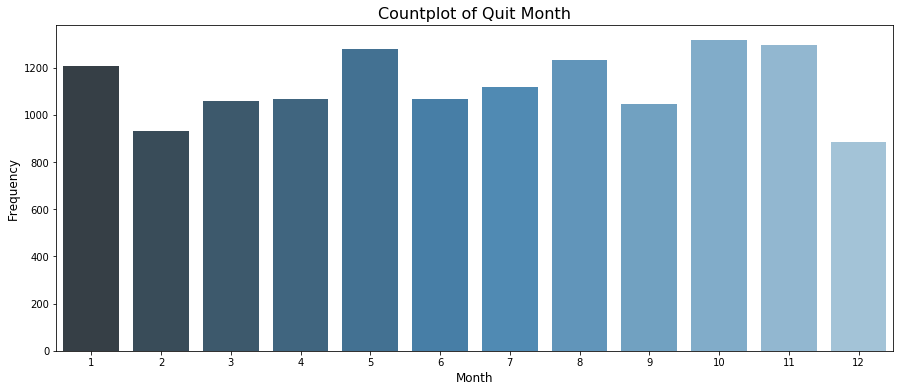

In [24]:
# Quit Month
quit_month = np.array(list(map(lambda x: x.month, churn_data['quit_date'])))
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(quit_month, ax=ax, palette = "Blues_d")
ax.set_title('Countplot of Quit Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()



In [25]:
counter_month=collections.Counter(quit_month)
print(counter_month.most_common(5))

[(10, 1317), (11, 1296), (5, 1278), (8, 1234), (1, 1209)]


**The churn data is highest in October-November and then dips in December and again picks up in January. This could primarily be because bonuses are distributed in december, employees collect their bonus and then quit.**

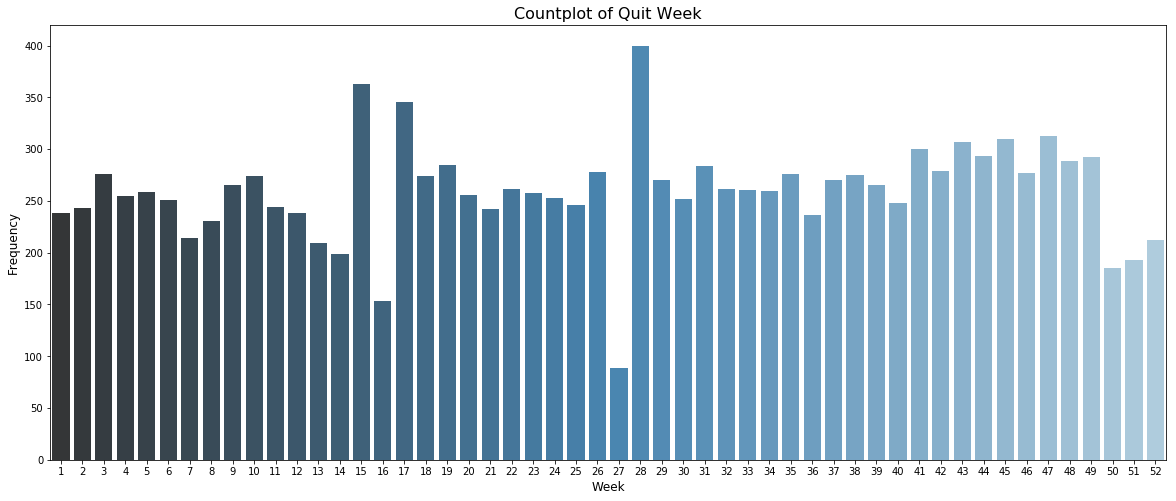

In [26]:
# Quit Week
quit_week = np.array(list(map(lambda x: x.week, churn_data['quit_date'])))
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(quit_week, ax=ax, palette = "Blues_d")
ax.set_title('Countplot of Quit Week', fontsize=16)
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [27]:
counter_week=collections.Counter(quit_week)
print(counter_week.most_common(5))

[(28, 400), (15, 363), (17, 346), (47, 313), (45, 310)]


### Machine Learning Model

In [28]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

from sklearn.metrics import auc, roc_curve, classification_report

In [29]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /Users/uditanand/anaconda3/h2o_jar/h2o.jar
  Ice root: /var/folders/f2/yf4m3k0n2pvb891mbppc8bym0000gn/T/tmpuky7cbai
  JVM stdout: /var/folders/f2/yf4m3k0n2pvb891mbppc8bym0000gn/T/tmpuky7cbai/h2o_uditanand_started_from_python.out
  JVM stderr: /var/folders/f2/yf4m3k0n2pvb891mbppc8bym0000gn/T/tmpuky7cbai/h2o_uditanand_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,8 months and 20 days !!!
H2O cluster name:,H2O_from_python_uditanand_pq10t9
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [30]:
data_month = np.array(list(map(lambda x: x.month, data['quit_date'])))
data['quit_month'] = data_month

In [31]:
data.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'salary_catg', 'seniority_catg', 'quit', 'quit_month'],
      dtype='object')

In [32]:
h2o_df = H2OFrame(data)
h2o_df['company_id'] = h2o_df['company_id'].asfactor()
h2o_df['dept'] = h2o_df['dept'].asfactor()
h2o_df['salary_catg'] = h2o_df['salary_catg'].asfactor()
h2o_df['seniority_catg'] = h2o_df['seniority_catg'].asfactor()
h2o_df['quit_month'] = h2o_df['quit_month'].asfactor()



/Users/uditanand/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [33]:
strat_split = h2o_df['quit'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['company_id', 'dept', 'seniority_catg', 'salary_catg', 'quit_month']
target = 'quit'

encoding = "one_hot_explicit"


In [34]:
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


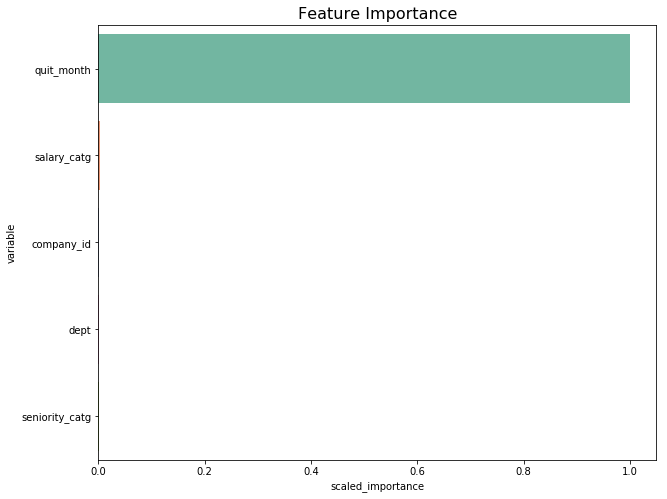

In [35]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Feature Importance', fontsize=16)
sns.barplot(x='scaled_importance', y='variable', data=importance, palette = "Set2")


plt.show()

In [36]:
h2o.cluster().shutdown()

H2O session _sid_8626 closed.


### If you could add to this data set just one variable that could help explain employee churn,what would that be?

**Salary at the next job would be the factor that I would like to add. This is because this one variable shed light on other
variables like seniority, reasons to leave, company and department.**